In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.size":14
})
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)
#plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

In [5]:
df = pd.read_csv("Code/runFolder/Results/ILU/2D/2DILU.csv")

In [18]:
idx, ps = pd.factorize(df["p"])
idx, ns = pd.factorize(df["n"])
ps = ps.to_numpy()
colors = ['r', 'b', 'g', 'c', 'k', 'm']
ns = ns.to_numpy()

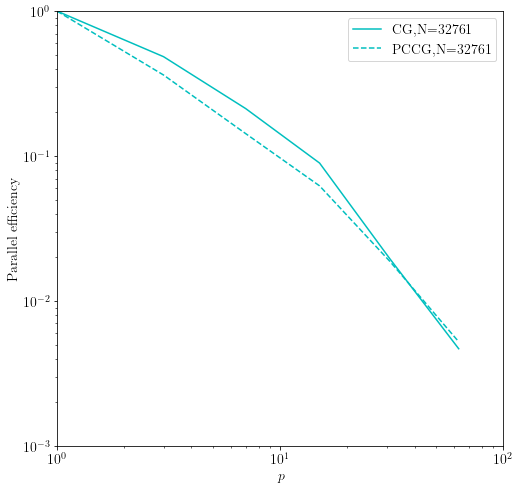

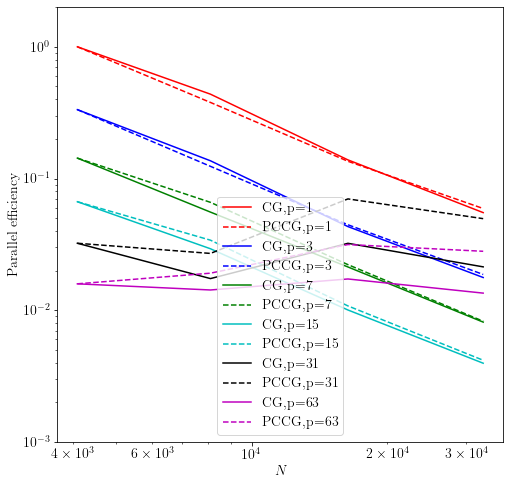

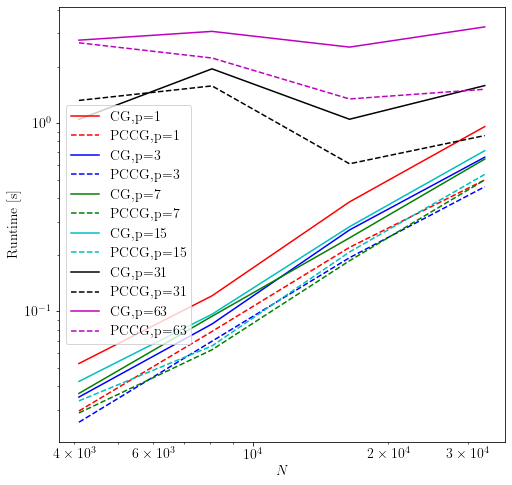

In [3]:
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.set_xlabel('$p$')
ax1.set_ylabel('Parallel efficiency')
i = 0
for n in ns:
    if (n == ns[-1]):
        dfn = df.query(f'n == {n}')
        TCG = dfn.TCG.to_numpy()
        TPCCG = dfn.TPCCG.to_numpy()
        speedupCG = TCG[0] / TCG
        speedupPCCG = TPCCG[0] / TPCCG
        efficiencyCG = speedupCG / ps
        efficiencyPCCG = speedupPCCG / ps
        ax1.loglog(ps,efficiencyCG,label=f'CG,N={n}', color = colors[i])
        ax1.loglog(ps,efficiencyPCCG,label=f'PCCG,N={n}',linestyle='--', color=colors[i])
    i += 1
ax1.set_xlim([1e0,1e2])
ax1.set_ylim([1e-3,1e0])
ax1.legend()    
plt.savefig('2D_ILU_effvsp.svg',format='svg')

fig2,ax2 = plt.subplots(figsize=(8,8))
ax2.set_xlabel('$N$')
ax2.set_ylabel("Parallel efficiency")

i = 0
for p in ps:
    dfp = df.query(f'p == {p}')
    TCG = dfp.TCG.to_numpy()
    TPCCG = dfp.TPCCG.to_numpy()
    speedupCG = TCG[0] / TCG
    speedupPCCG = TPCCG[0] / TPCCG
    efficiencyCG = speedupCG / p
    efficiencyPCCG = speedupPCCG / p
    ax2.loglog(ns,efficiencyCG,label=f'CG,p={p}',color=colors[i])
    ax2.loglog(ns,efficiencyPCCG,label=f'PCCG,p={p}',linestyle='--',color=colors[i])
    i += 1
ax2.set_ylim(1e-3,1e0+1)
ax2.legend()
plt.savefig('2D_ILU_effvsN.svg',format='svg')


fig3,ax3 = plt.subplots(figsize=(8,8))
ax3.set_xlabel('$N$')
ax3.set_ylabel("Runtime [s]")
i = 0
for p in ps:
    dfp = df.query(f'p == {p}')
    TCG = dfp.TCG.to_numpy()
    TPCCG = dfp.TPCCG.to_numpy()
    ax3.loglog(ns,TCG,label=f'CG,p={p}',color=colors[i])
    ax3.loglog(ns,TPCCG,label=f'PCCG,p={p}',linestyle='--',color=colors[i])
    i += 1
ax3.legend()
fig3
plt.savefig('2D_ILU_tvsN.svg',format='svg')    

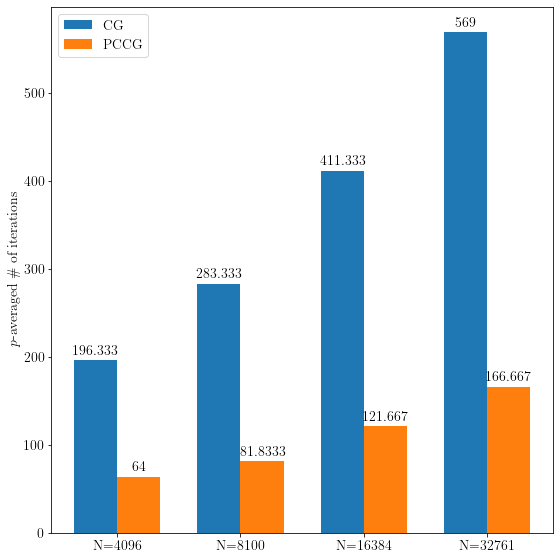

In [8]:
labels = []
ITCGavg = []
ITPCCGavg = []
i = 0
for n in ns:
    labels = labels + ['N=' + str(ns[i])]
    dfp = df.query(f'n == {n}')
    ITCGavg = ITCGavg + [np.average(dfp.ITCG.to_numpy())]
    ITPCCGavg = ITPCCGavg + [np.average(dfp.ITPCCG.to_numpy())]
    i += 1

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig4, ax4 = plt.subplots(figsize=(8,8))
rects1 = ax4.bar(x - width/2, ITCGavg, width, label='CG')
rects2 = ax4.bar(x + width/2, ITPCCGavg, width, label='PCCG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax4.set_ylabel('$p$-averaged \# of iterations')
ax4.set_xticks(labels=labels, ticks=x)
ax4.legend()

ax4.bar_label(rects1, padding=3)
ax4.bar_label(rects2, padding=3)

fig4.tight_layout()
plt.savefig('2D_ILU_intvsN.svg',format='svg')

In [8]:
df.n.to_numpy() / df.p.to_numpy()

array([ 4096.        ,  1365.33333333,   585.14285714,   273.06666667,
         132.12903226,    65.01587302,  8100.        ,  2700.        ,
        1157.14285714,   540.        ,   261.29032258,   128.57142857,
       16384.        ,  5461.33333333,  2340.57142857,  1092.26666667,
         528.51612903,   260.06349206, 32761.        , 10920.33333333,
        4680.14285714,  2184.06666667,  1056.80645161,   520.01587302])

In [9]:
wsids1 = [1, 8, 15, 22]
wsids2 = [2, 9, 16, 23]
wsids3 = [3, 10, 17]

In [24]:
df.loc[wsids2,:]

,n,p,TCG,TPCCG,ITCG,ITPCCG
2,4096,7,0.0367,0.0289,211,67
9,8100,15,0.0967,0.0656,293,83
16,16384,31,1.0500,0.6090,413,123
23,32761,63,3.2500,1.5150,555,170


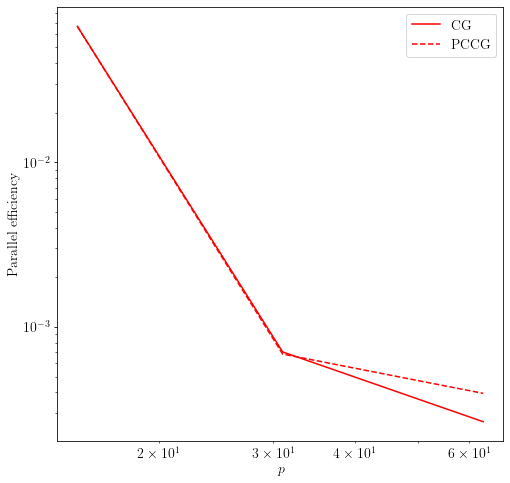

In [27]:
fig5,ax5 = plt.subplots(figsize=(8,8))
ax5.set_xlabel('$p$')
ax5.set_ylabel('Parallel efficiency')
dfn = df.loc[wsids3,:]
idx, ps = pd.factorize(dfn["p"])
idx, ns = pd.factorize(dfn["n"])
ps = ps.to_numpy()
colors = ['r', 'b', 'g', 'c', 'k', 'm']
ns = ns.to_numpy()
TCG = dfn.TCG.to_numpy()
TPCCG = dfn.TPCCG.to_numpy()
speedupCG = TCG[0] / TCG
speedupPCCG = TPCCG[0] / TPCCG
efficiencyCG = speedupCG / ps
efficiencyPCCG = speedupPCCG / ps
ax5.loglog(ps,efficiencyCG,label=f'CG', color = colors[i])
ax5.loglog(ps,efficiencyPCCG,label=f'PCCG',linestyle='--', color=colors[i])
#ax5.set_xlim([1e0,1e2])
#ax5.set_ylim([1e-3,1e0])
ax5.legend()    